# BHARAT INTERN

# TASK-2:Titanic Classification

Task Description : Make a system which tells Whether the person will be save from sinking . What factors were most likely lead to Success-Socio-econimic Status,age,gender and more

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = sns.load_dataset('titanic')

In [3]:
data_set.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data_set.shape

(891, 15)

Considering columns that most effect the Sinking rate of a person

In [5]:
data=data_set.loc[:,['survived','pclass','sex','age','who','embark_town','alone']]

In [6]:
data.head()

,survived,pclass,sex,age,who,embark_town,alone
0,0,3,male,22.0,man,Southampton,False
1,1,1,female,38.0,woman,Cherbourg,False
2,1,3,female,26.0,woman,Southampton,True
3,1,1,female,35.0,woman,Southampton,False
4,0,3,male,35.0,man,Southampton,True


# Cleaning the data

In [7]:
#Checking for null values
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
who              0
embark_town      2
alone            0
dtype: int64

In [8]:
# dropping all rows with null values
data.dropna(inplace=True)

In [10]:
#Now all null values has been removed
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
who            0
embark_town    0
alone          0
dtype: int64

# Data Visualisation

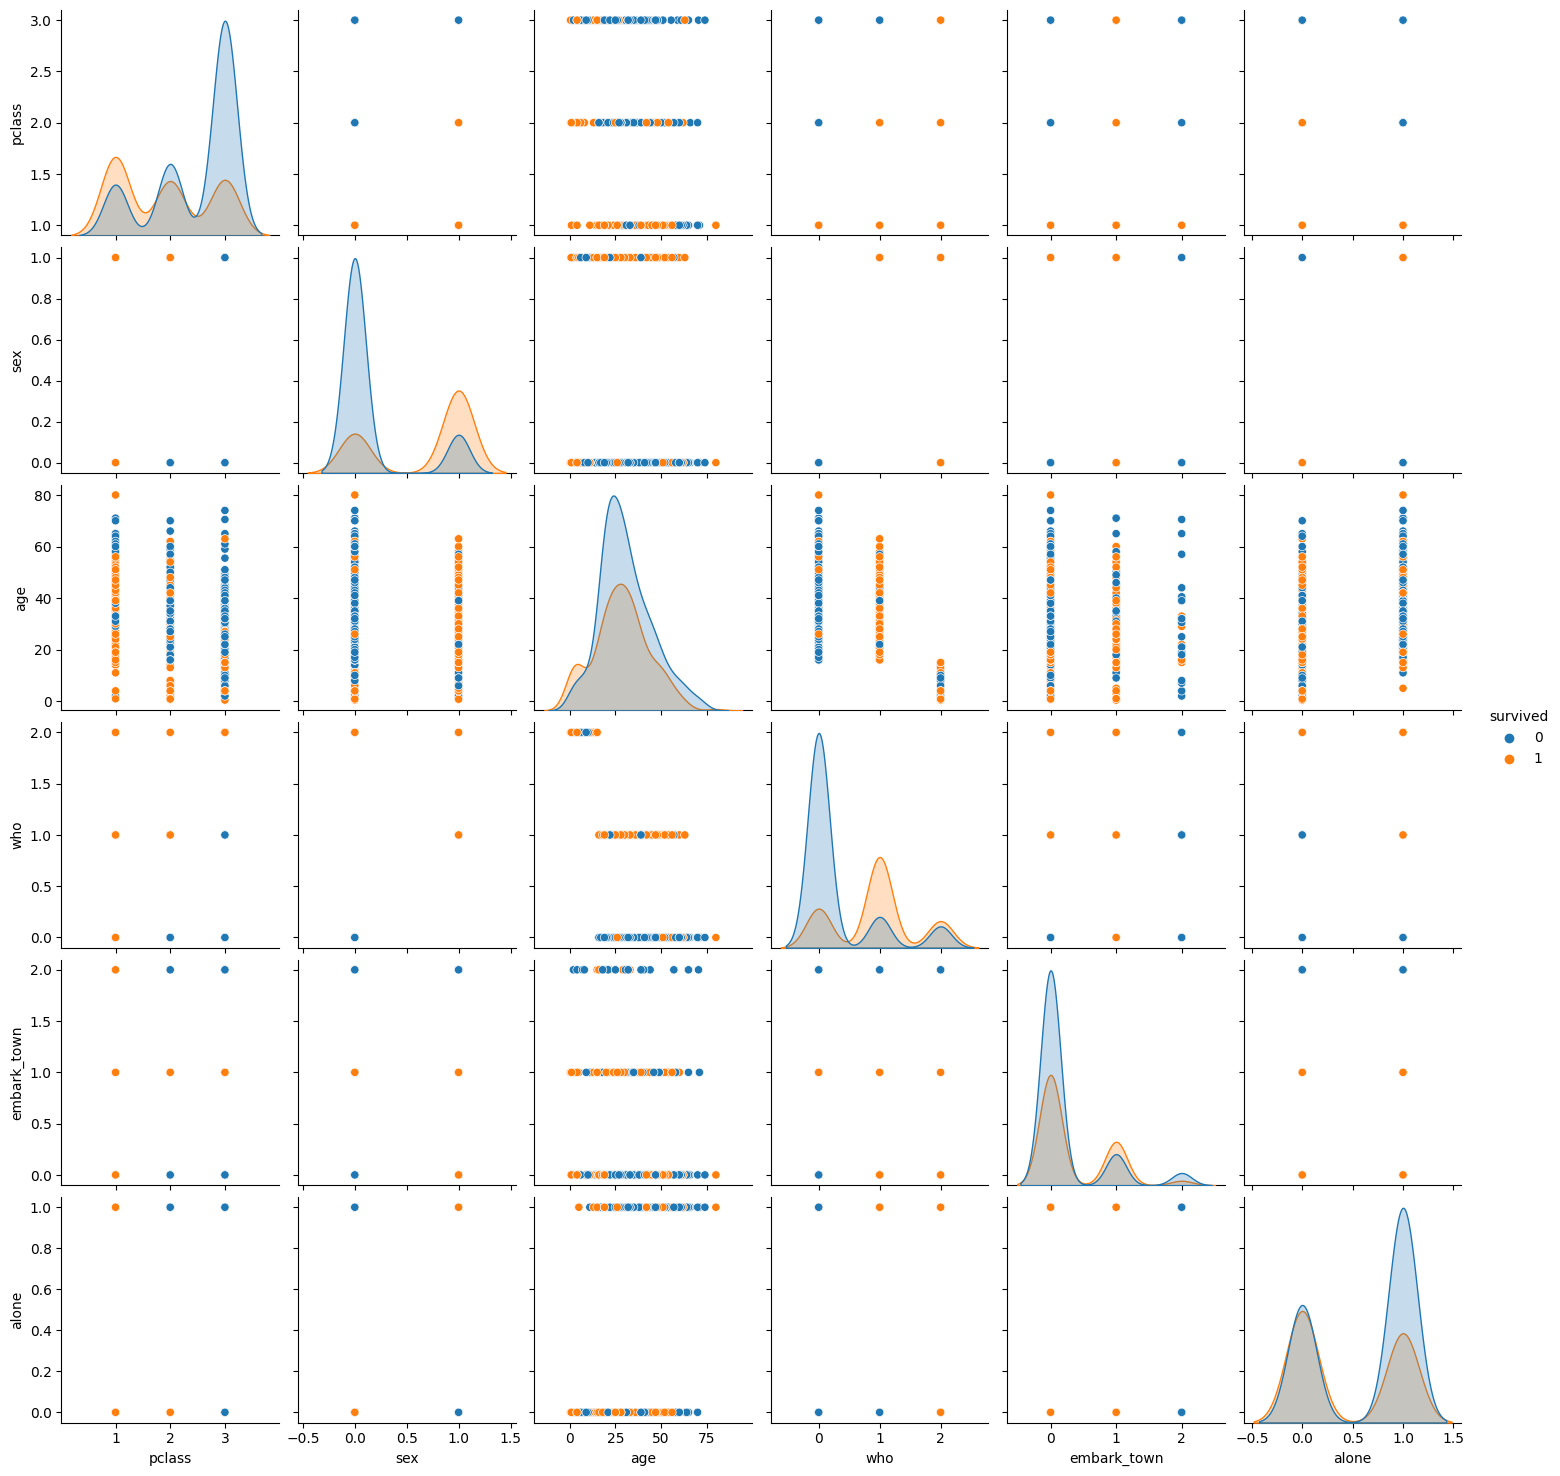

In [149]:
sns.pairplot(data=data,hue='survived')

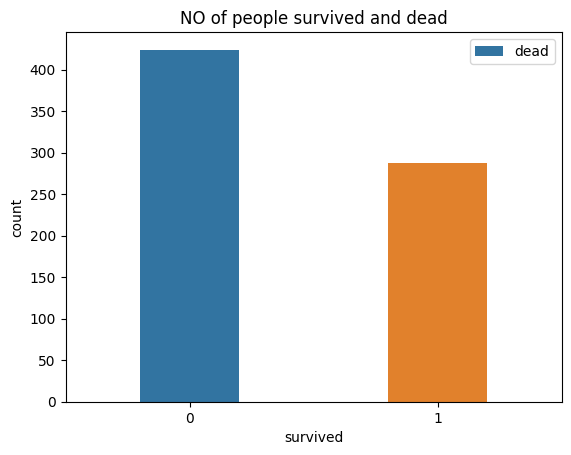

In [69]:
plt.title("NO of people survived and dead")
sns.countplot(x='survived',data=data,width=0.4)
plt.legend(['dead'],loc='upper right')
plt.show()

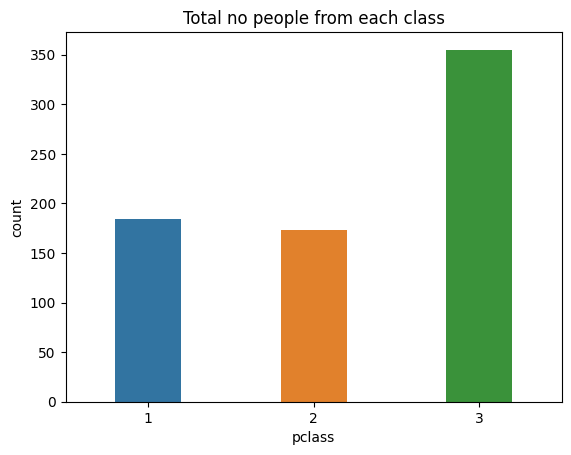

In [70]:
plt.title("Total no people from each class")
sns.countplot(x='pclass',data=data,width=0.4)
plt.show()

Most of the people are from 'THIRD' class

In [63]:
new_data = data.groupby(['pclass'],as_index=False)['survived'].sum()

In [64]:
new_data

,pclass,survived
0,1,120
1,2,83
2,3,85


<Axes: title={'center': 'No of people survived from each class'}, xlabel='pclass', ylabel='survived'>

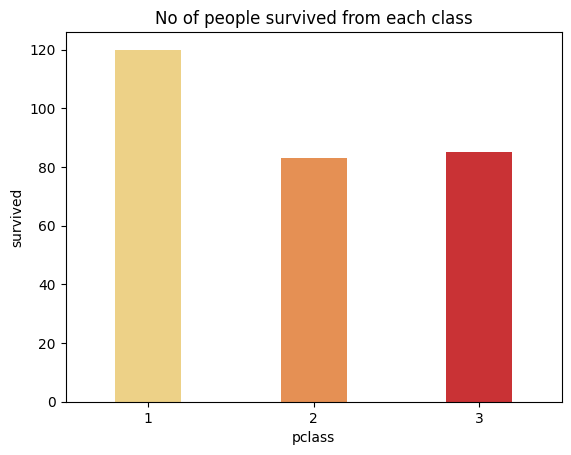

In [73]:
# no of people survived from each class
plt.title("No of people survived from each class")
sns.barplot(x=new_data['pclass'],y=new_data['survived'],data=new_data,palette='YlOrRd',width=0.4)

Most of the people are survived from 'FIRST' class

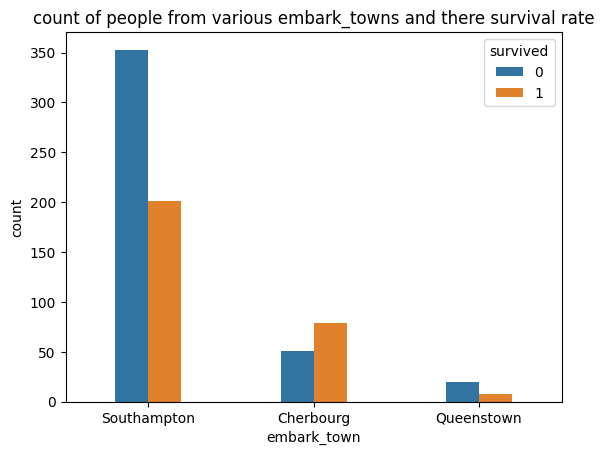

In [103]:
plt.title("count of people from various embark_towns and there survival rate")
sns.countplot(x='embark_town',data=data,width=0.4,hue='survived')
plt.show()

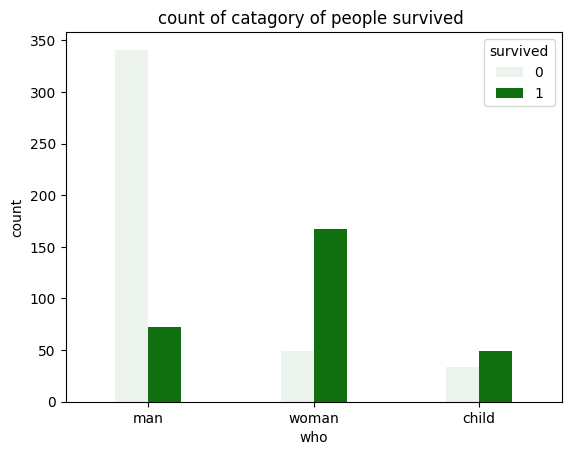

In [122]:
plt.title("count of catagory of people survived ")
sns.countplot(x='who',data=data,width=0.4,hue='survived',color='green')
plt.show()

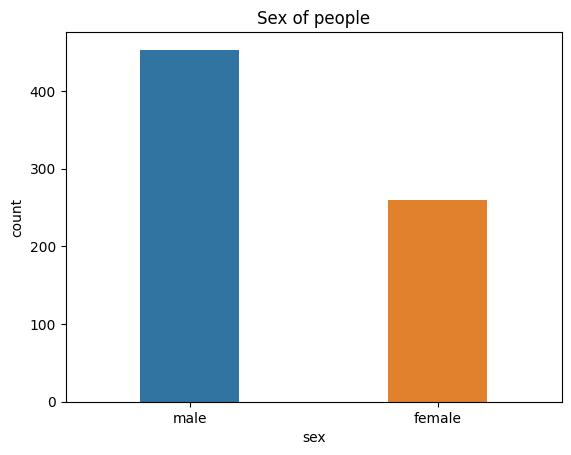

In [76]:
plt.title("Sex of people")
sns.countplot(x='sex',data=data,width=0.4)
plt.show()

In [88]:
new_data = data.groupby(['sex'])['survived'].sum()
new_data

sex
female    195
male       93
Name: survived, dtype: int64

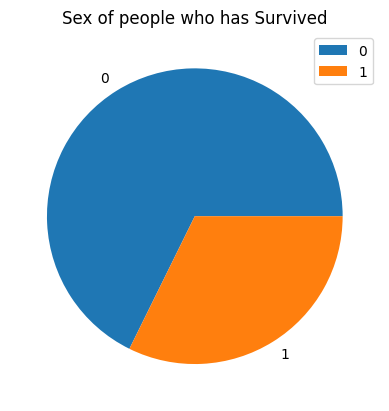

In [106]:
p=[195,93]
mylables = new_data.index
plt.title("Sex of people who has Survived")
plt.pie(p,labels=mylables)
plt.legend()
plt.show()

most of the people survived are from "Southampton"

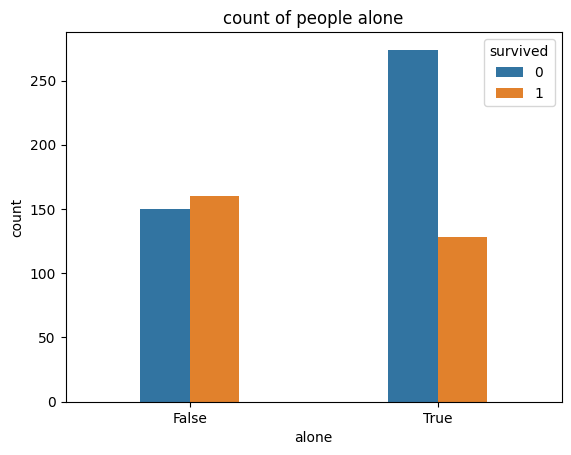

In [100]:
plt.title("count of people alone")
sns.countplot(x='alone',data=data,width=0.4,hue='survived')
plt.show()

# Feature Encoding

In [107]:
data.head()

,survived,pclass,sex,age,who,embark_town,alone
0,0,3,male,22.0,man,Southampton,False
1,1,1,female,38.0,woman,Cherbourg,False
2,1,3,female,26.0,woman,Southampton,True
3,1,1,female,35.0,woman,Southampton,False
4,0,3,male,35.0,man,Southampton,True


In [147]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'who':{'man':0,'woman':1,'child':2}},inplace=True)
data.replace({'embark_town':{'Southampton':0,'Cherbourg':1,'Queenstown':2}},inplace=True)
data.replace({'alone':{'False':0,'True':1}},inplace=True)

In [206]:
data.head()

,survived,pclass,sex,age,who,embark_town,alone
0,0,3,0,22.0,0,0,False
1,1,1,1,38.0,1,1,False
2,1,3,1,26.0,1,0,True
3,1,1,1,35.0,1,0,False
4,0,3,0,35.0,0,0,True


hence are all categorical values are encoded into numerical values

In [274]:
# assigning x and y values
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [275]:
x.head()

,pclass,sex,age,who,embark_town,alone
0,3,0,22.0,0,0,False
1,1,1,38.0,1,1,False
2,3,1,26.0,1,0,True
3,1,1,35.0,1,0,False
4,3,0,35.0,0,0,True


In [276]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

# Splitting the data into Training and Testing Data

In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#Training data = 80% , Testing data = 20%

In [278]:
x_train.shape

(569, 6)

In [279]:
x_test.shape

(143, 6)

# Using Random Forest Machine Learning Algorithm

In [280]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [281]:
# training the Machine Learning model with training data
clf.fit(x_train,y_train)

RandomForestClassifier()

successfully trained the machine learning model using training data

In [282]:
# predicting the output of test data
prediction = clf.predict(x_test)

In [283]:
prediction

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [284]:
y_test

791    0
305    1
870    0
537    1
588    0
      ..
614    0
83     0
683    0
307    1
657    0
Name: survived, Length: 143, dtype: int64

# Finding the accuracy of the prediction

In [285]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8181818181818182

hence our model predicted the survival rate of a person with "81%" accuracy

# Using Some Sample input

In [286]:
input_sample=(3,0,67,0,3,True)
input_sample=np.asarray(input_sample)
input_sample=input_sample.reshape(1,-1)
input_sample

array([[ 3,  0, 67,  0,  3,  1]])

In [287]:
prediction=classifier.predict(input_sample)

C:\Users\Nikhileswari Puvvula\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [288]:
prediction

array([0], dtype=int64)

In [289]:
if prediction[0]==0:
    print("The chances for person SINKING are high")
else:
    print("The chances for person NOT SINKING are high")

The chances for person SINKING are high


# CONCLUSION

Hence a system which tells whether the person will be save from sinking is created.